In [12]:
import pandas as pd
import numpy as np 
import math
import geopy
import matplotlib.pyplot as plt


In [13]:
data = pd.read_csv("data/cleaned_unique_index.csv",low_memory=False)
data.set_index("code",inplace=True)
data.head()

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
palm_oil = pd.read_csv("data/palm_oil.csv")
palm_oil.set_index("code",inplace=True)
palm_oil = palm_oil[palm_oil.ingredients_from_palm_oil_n>0]
label = pd.read_csv("data/labels.csv")
label.set_index("code",inplace=True)
label.head()

,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [15]:
label_flatted = label["labels_en"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
label_flatted.columns = ["labels"]
label_flatted = label_flatted.reset_index().set_index("code")
label_flatted = label_flatted[["labels"]]
label_flatted.head()

,labels
code,
0000000020114,Made in France
0000000274722,fr:Viande Française
0000003444009,Contains GMOs
0000005200016,Organic
0000007020254,Kosher


In [42]:
## format better labels name
def strip_preposition(string):
    if (len(string) > 3 and string[2] == ":") or string.startswith("fr:") or string.startswith("en:") or string.startswith("de:"):
        return string[3:]
    else : 
        return string
label_flatted["labels"] = label_flatted["labels"].apply(lambda x : strip_preposition(x))

In [43]:
joined = palm_oil.join(label_flatted)
joined.head()

,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,labels
code,,,,,,,
0000000290616,1.0,NaN,huile-de-palme,0.0,NaN,NaN,NaN
0000010206515,1.0,NaN,huile-de-palme,1.0,NaN,e471-mono-et-diglycerides-d-acides-gras-alimen...,Gluten-free
0000069006562,1.0,NaN,huile-de-palme,0.0,NaN,NaN,NaN
00023092,1.0,NaN,huile-de-palme,0.0,NaN,NaN,NaN
00027083,1.0,NaN,huile-de-palme,3.0,NaN,"e481-stearoyl-2-lactylate-de-sodium,e472e-este...",Gluten-free


In [44]:
def trend_line(data,x,y):
    """
        This plots a trend line on a plot. 
        It is nice to use it on scatter plots. 
    """
    z = np.polyfit(data[x], data[y], 1) # fit it to a polynomial 
    p = np.poly1d(z) # do a 1d polynomial ie. a line. 
    plt.plot(data[x],p(data[x]),color="r")

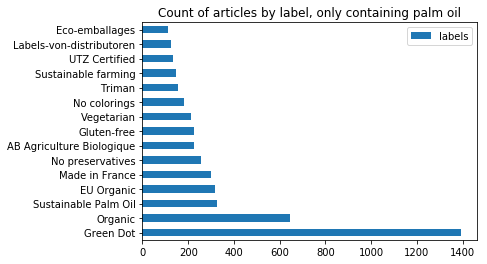

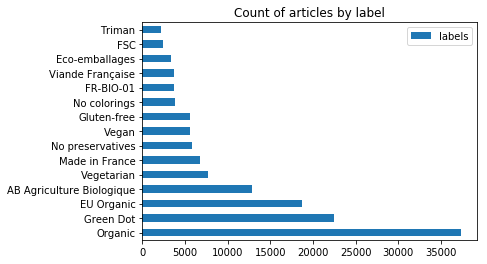

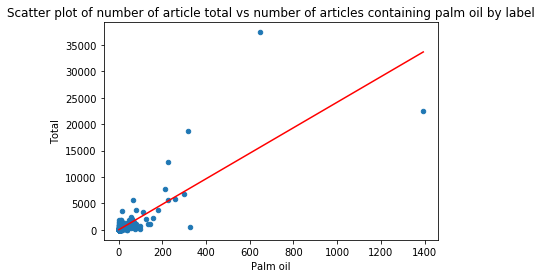

In [45]:
joined_cnt = joined["labels"].value_counts().to_frame()
joined_cnt.nlargest(15,'labels').plot.barh(title="Count of articles by label, only containing palm oil")
label_cnt = label_flatted["labels"].value_counts().to_frame()
label_cnt.nlargest(15,'labels').plot.barh(title="Count of articles by label")
label_cnt.columns = ["label_cnt"]
joined_cnt.columns=["palm_cnt"]
total = joined_cnt.join(label_cnt)
plt.show()
total.plot.scatter("palm_cnt","label_cnt",title="Scatter plot of number of article total vs number of articles containing palm oil by label")
plt.xlabel("Palm oil")
plt.ylabel("Total")
trend_line(total,"palm_cnt","label_cnt")
plt.savefig("correlation_lab_palm.png",bbox_inches="tight")
plt.show()

In [46]:
# Investigating correlation ! 
total.corr(method="spearman")

,palm_cnt,label_cnt
palm_cnt,1.00000,0.75992
label_cnt,0.75992,1.00000


In [47]:
total["normalized"] = total["palm_cnt"] / total["label_cnt"]

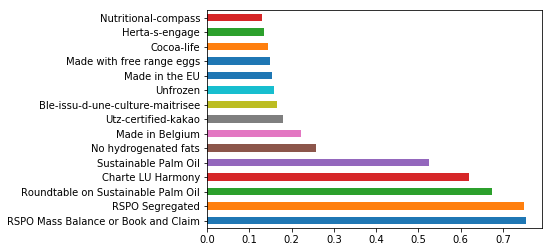

In [56]:
total[total["label_cnt"] > 50]["normalized"].nlargest(15).plot.barh()
plt.savefig

## Discussion 
<p> RSPO means roundtable on sustainable palm oil. Its an organization working towards sustainable use of palm oil</p>
<p> Therefore there is no surprise when we see that the labels containing the most palm oil products are the one that have to do with RSPO. However we can see that UTZ cacao products will often contain palm oil, and also Cocoa life. </p>
<p> Hence a consumer wanting to avoid palm oil should definetly be on the look out for those labels. </p> 